In [23]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [24]:
def erosion(image, structuring_element):
    eroded_image = []
    image //= 255
    offset = structuring_element.shape[1] // 2
    height, width = image.shape[0], image.shape[1]

    for r in range(height):
        nth_row = []
        for c in range(width):
            isFit = True
            for x in range(-offset, offset + 1):
                for y in range(-offset, offset + 1):
                    if((r + x)>=0 and (r+x)<height and (c+y)>=0 and (c+y)<width):
                        if((structuring_element[(x+offset), (y+offset)] == 1) and (image[(r+x), (c+y)] != structuring_element[(x+offset), (y+offset)])):
                        # if (np.all(structuring_element[(x+offset), (y+offset)] == 1) and np.any(image[(r+x), (c+y)] != structuring_element[(x+offset), (y+offset)])):
                            isFit = False
            pixel_value = 1 if isFit else 0
            nth_row.append(pixel_value)
        eroded_image.append(nth_row)
    image = image * 255
    eroded_image = np.uint8(eroded_image)
    return eroded_image * 255


In [25]:
def dilation(image, structuring_element):
    dilated_image = []
    image //= 255
    offset = structuring_element.shape[1] // 2
    # print(image.shape)
    height, width = image.shape

    for r in range(height):
        nth_row = []
        for c in range(width):
            isHit = False
            for x in range(-offset, offset + 1):
                for y in range(-offset, offset + 1):
                    if((r + x)>=0 and (r+x)<height and (c+y)>=0 and (c+y)<width):
                        if(structuring_element[x+offset, y+offset] == 1 and image[r+x, c+y] == structuring_element[x+offset, y+offset]):
                            isHit = True
            pixel_value = 1 if isHit else 0
            nth_row.append(pixel_value)
        dilated_image.append(nth_row)
    image = image * 255
    dilated_image = np.uint8(dilated_image)
    return dilated_image * 255


In [26]:
structuring_element = np.ones((3, 3))
structuring_element = np.uint8(structuring_element)

Opening Function

In [27]:
def opening(image, structuring_element):
    opened_image = erosion(image, structuring_element)
    opened_image = dilation(opened_image, structuring_element)
    return opened_image

Closing Function

In [28]:
def closing(image, structuring_element):
    closed_image = dilation(image, structuring_element)
    closed_image = erosion(closed_image, structuring_element)
    return closed_image

Show Original Image

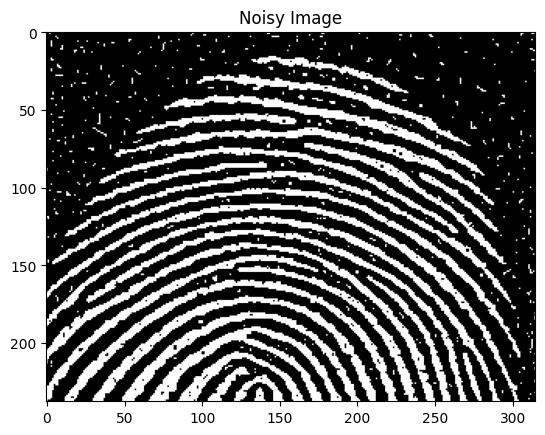

In [29]:
noisy_image = cv2.imread("../SrcImage/Fig0911(a) Noisy Fingerprint 315x238.tif", 0) # Load Grayscale image
plt.imshow(cv2.cvtColor(noisy_image, cv2.COLOR_BGR2RGB))
plt.title("Noisy Image")
plt.show()

Opening the image
    

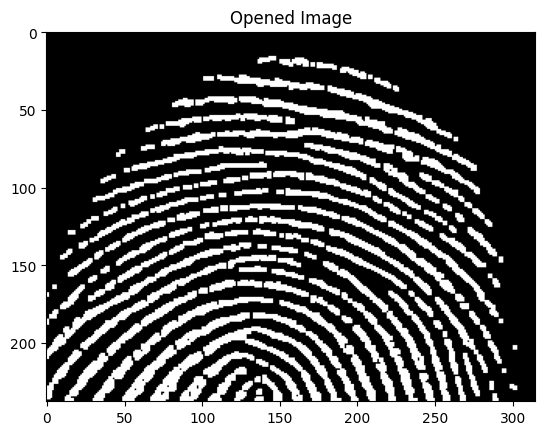

In [30]:
opened_image = opening(noisy_image, structuring_element)
plt.imshow(cv2.cvtColor(opened_image, cv2.COLOR_BGR2RGB))
plt.title("Opened Image")
plt.show()

Closing the Image

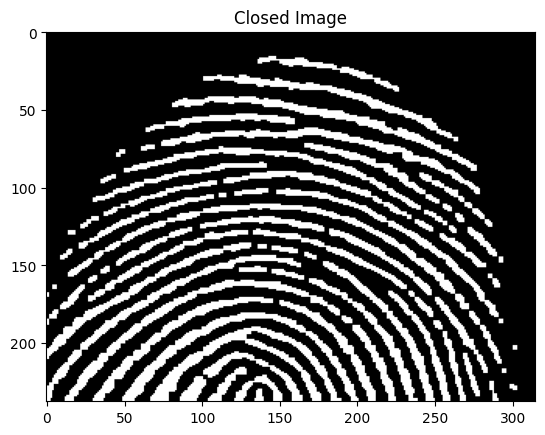

In [31]:
closed_image = closing(opened_image, structuring_element)
plt.imshow(cv2.cvtColor(closed_image, cv2.COLOR_BGR2RGB))
plt.title("Closed Image")
plt.show()